<a href="https://colab.research.google.com/github/VimalChamyal/Titanic-Dataset-EDA/blob/main/EDA_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing the necessary libraries
import pandas as pd
import numpy as np

# Importing the dataset
url = 'https://github.com/VimalChamyal/Titanic-Dataset-EDA/raw/main/train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check for the duplicate rows.

dup_col = df.duplicated()
dup_col.unique()

array([False])

In [7]:
# Getting quick info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

# Columns with the object data types won't be included here. As statiscal analysis can be done for numeric data types only.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Check the categorical and numerical columns

# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [12]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [13]:
#Removal of unwanted observations

As we know our machines don’t understand the text data. So, we have to either drop or convert the categorical column values into numerical types. Here we are dropping the Name columns because the Name will be always unique and it hasn’t a great influence on target variables. Same applies for the ticket.

In [14]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

In [15]:
df.shape

(891, 12)

In [17]:
# Handling missing data

# Checking the % missing values columns-wise for each row using df.isnull()

round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

As we can see from the above result that Cabin has 77% null values and Age has 19.87% and Embarked has 0.22% of null values. So, it’s not a good idea to fill 77% of null values. So, we will drop the Cabin column. Embarked column has only 0.22% of null values so, we drop the null values rows of Embarked column.

In [20]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
# dropna is used to drop na, drop with condition in short. Whereas drop deletes the whole column
df2.shape

(889, 9)

In pandas axis = 0 refers to horizontal axis or rows and axis = 1 refers to vertical axis or columns.

The dropna() method removes the rows that contains NULL values.

The 'inplace=True' argument stands for the data frame has to make changes permanent

In [19]:
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

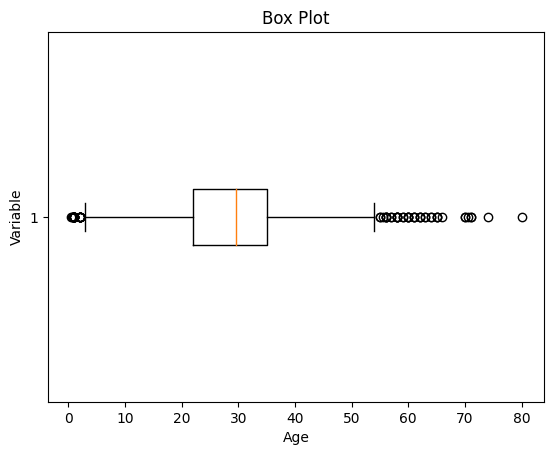

In [21]:
# Handling outliers

import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [22]:
age = df3['Age']

# finding the 1st quartile
q1 = np.quantile(age, 0.25)

# finding the 3rd quartile
q3 = np.quantile(age, 0.75)
med = np.median(age)

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

print(iqr, upper_bound, lower_bound)

13.0 54.5 2.5


In [23]:
# From the result we got above, any value below 2.5 and above 54.5 will be an outlier

In [24]:
# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound)
                & (df3['Age'] <= upper_bound)]

In [25]:
# Data transformation

For the machine learning prediction, we separate independent and target features.

Here we will consider 'Pclass' ‘Sex’ ‘Age’ ‘SibSp’, ‘Parch’ ‘Fare’ ‘Embarked’ only as the independent features and Survived as target variables. Because PassengerId will not affect the survival rate.

In [28]:
X = df4[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df4['Survived']

In [29]:
from sklearn.preprocessing import MinMaxScaler

# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

<ipython-input-29-4504e0c4e47a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.372549,0.125,0.0,0.014151,S
1,0.0,female,0.686275,0.125,0.0,0.139136,C
2,1.0,female,0.450980,0.000,0.0,0.015469,S
3,0.0,female,0.627451,0.125,0.0,0.103644,S
4,1.0,male,0.627451,0.000,0.0,0.015713,S


One-Hot Encoding

Because machine learning algorithms assume (and require) your data to be numeric, categorical data must be pre-processed in order for it to be accepted.


In [31]:
# One-hot encoding a single column

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(x1[['Sex']])
print(transformed.toarray())

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [32]:
# Getting one hot encoded categories

print(ohe.categories_)

[array(['female', 'male'], dtype=object)]


In [33]:
x1[ohe.categories_[0]] = transformed.toarray()
x2 = x1.drop(columns='Sex')
print(x2.head())

   Pclass       Age  SibSp  Parch      Fare Embarked  female  male
0     1.0  0.372549  0.125    0.0  0.014151        S     0.0   1.0
1     0.0  0.686275  0.125    0.0  0.139136        C     1.0   0.0
2     1.0  0.450980  0.000    0.0  0.015469        S     1.0   0.0
3     0.0  0.627451  0.125    0.0  0.103644        S     1.0   0.0
4     1.0  0.627451  0.000    0.0  0.015713        S     0.0   1.0


<ipython-input-33-cfd063bb89c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[ohe.categories_[0]] = transformed.toarray()
